In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
sys.path.append('/home/manu/TFG_repo/scripts')  # make modules in scripts folder callable from notebooks

In [2]:
import sys
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [3]:
from analysis_routines import *
from plotting_routines_xr import *
from processing_routines import datenum_to_epoch
from wavelet_analysis import wavelet_power_spectrum
from harmonic_analysis import *
plt.style.use('/home/manu/TFG_repo/notebooks/mplstyles/notebook.mplstyle')

## Notebook structure and content:
3 periods that exhibit clear tidal variability without strong influence of other processes are selected. For each of them, the temperature of the column and MLD are ploted. The tidal constituents are obtained for the thermistor data and for the fit components D1, a2 and G005 with UTide and explored. Finally the series is passed through UTide as a whole. 

### Imports and global variables

In [4]:
fit_chain = load_SHDR_fit('optimal_server_fit/AGL_20181116_fit_fci.csv')
data_chain = load_time_series_xr('processed/AGL_20181116_chain_xrcompatible.nc')
G005 = pd.read_csv(data_dir / 'SHDR_fit/aux/G05.csv', index_col='date', parse_dates=True)
delta005 = pd.read_csv(data_dir / 'SHDR_fit/aux/delta05_ci.csv', index_col='date', parse_dates=True)

In [5]:
D1_np = fit_chain.D1.to_numpy()
G005_np = G005.x.to_numpy()

low = period_to_freq(24*3, 'h')
D1_highpass = highpass_filter(D1_np, data_chain.date, 1/5, low)

In [6]:
# dates defining_periods
date_0 = datetime(2018, 11, 16, 11) # period_1
date_1 = datetime(2018, 11, 24)
period_1 = [date_0, date_1]

date_2 = datetime(2018, 11, 30) # period_2
date_3 = datetime(2018, 12, 9)
period_2 = [date_2, date_3]

date_4 = datetime(2019, 1, 5) # period_3
date_5 = datetime(2019, 1, 14)
period_3 = [date_4, date_5]

## Period_1

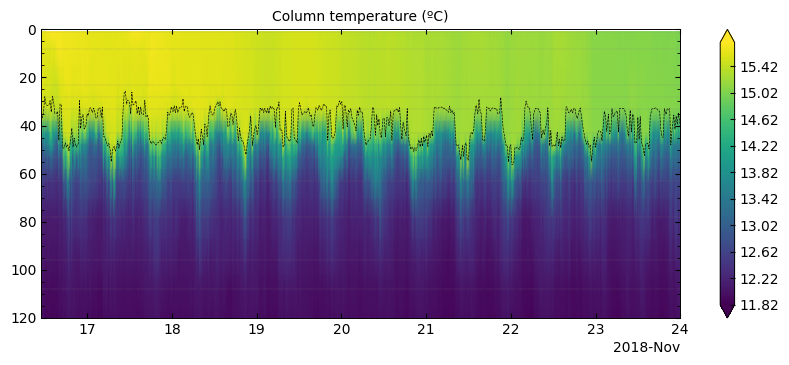

In [15]:
plot_column_temperature(data_chain, fit_chain, period=period_1, ylims=[120, 0])

In [7]:
up1_fit = TidalComponentsFit.compute(fit_chain, period=period_1)
up1_G005 = coef_dataframe(G005.x, period=period_1)
up1_delta005 = coef_dataframe(delta005.x, period=period_1)
up1_column = column_coefs([28, 33, 43, 48, 53, 63, 78, 96, 108])
up1_column.compute(data_chain, period=period_1)

In [19]:
up3_G005.loc['M2']

period     12.420601
PE         28.572421
SNR         5.599726
A           0.001611
A_ci        0.001334
g         295.841741
g_ci       47.608339
Name: M2, dtype: float64

In [8]:
print_component(up1_fit, up1_G005, 'M2')
print_component(up1_fit, up1_G005, 'M4')

M2:
ampl -> D1: 4.36+-0.75 m; a2: 0.00687+-0.01024 ºC; G05: 0.0075+-0.0036 ºC/m
fase -> D1: 4.56+-9.92 º; a2: 176.78996+-85.50189 º; G05: 189.6778+-27.4229 º
M4:
ampl -> D1: 0.93+-0.36 m; a2: 0.00412+-0.00241 ºC; G05: 0.0012+-0.0007 ºC/m
fase -> D1: 10.27+-22.14 º; a2: 84.14463+-33.68445 º; G05: 159.0979+-34.5824 º


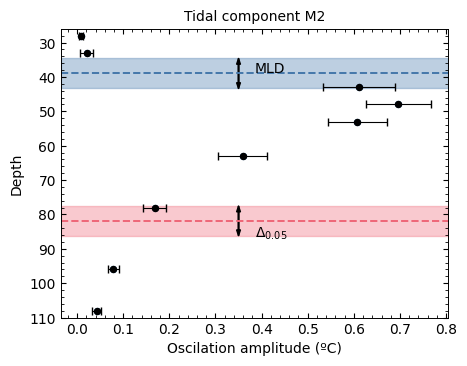

In [18]:
plot_column_oscilation(up1_column, 'M2', up1_fit.D1, up1_delta005, pos1=[0.5, 0.85],
                       pos2=[0.5, 0.28], x_arrow=0.35)

## Period_2

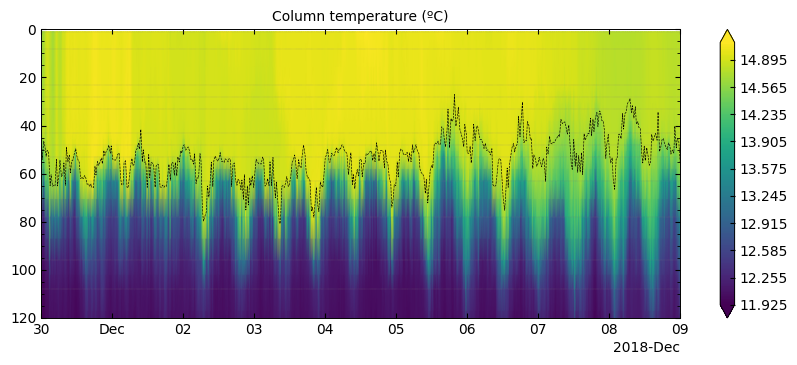

In [19]:
plot_column_temperature(data_chain, fit_chain, period=period_2, ylims=[120, 0])

In [13]:
up2_fit = TidalComponentsFit.compute(fit_chain, period=period_2)
up2_G005 = coef_dataframe(G005.x, period=period_2)
up2_delta005 = coef_dataframe(delta005.x, period=period_2)
up2_column = column_coefs([28, 33, 43, 48, 53, 63, 78, 96, 108])
up2_column.compute(data_chain, period=period_2)

In [20]:
print_component(up2_fit, up2_G005, 'M2')
print_component(up2_fit, up2_G005, 'M4')

M2:
ampl -> D1: 6.29+-0.76 m; a2: 0.00262+-0.00492 ºC; G05: 0.0066+-0.0024 ºC/m
fase -> D1: 8.09+-6.86 º; a2: 83.46951+-108.32035 º; G05: 209.1697+-20.5689 º
M4:
ampl -> D1: 0.73+-0.56 m; a2: 0.00257+-0.00149 ºC; G05: 0.0013+-0.0013 ºC/m
fase -> D1: 43.07+-44.27 º; a2: 359.87098+-33.19264 º; G05: 0.8896+-55.2079 º


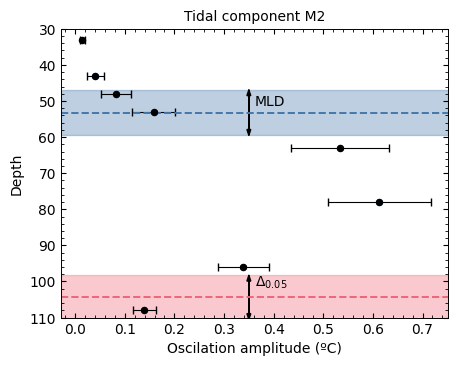

In [22]:
plot_column_oscilation(up2_column, 'M2', up2_fit.D1, up2_delta005, pos1=[0.5, 0.735],
                       pos2=[0.5, 0.11], x_arrow=0.35, ylim=(110, 30))

## Period_3

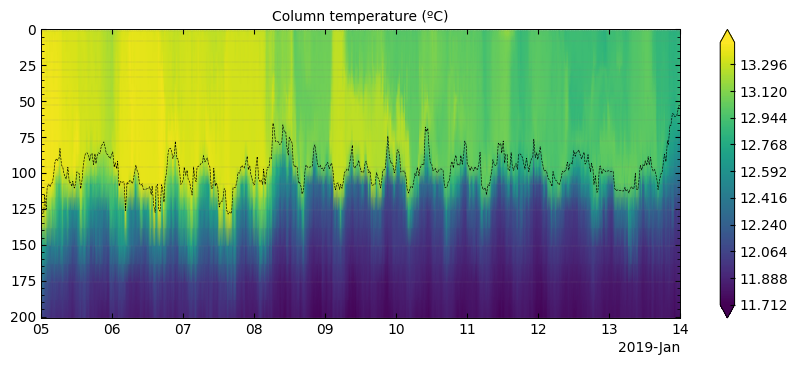

In [12]:
plot_column_temperature(data_chain, fit_chain, period=period_3)

In [14]:
up3_fit = TidalComponentsFit.compute(fit_chain, period=period_3)
up3_G005 = coef_dataframe(G005.x, period=period_3)
up3_delta005 = coef_dataframe(delta005.x, period=period_3)
up3_column = column_coefs([96, 108, 126, 151, 176])
up3_column.compute(data_chain, period=period_3)

In [15]:
print_component(up3_fit, up3_G005, 'M2')
print_component(up3_fit, up3_G005, 'M4')

M2:
ampl -> D1: 7.82+-1.05 m; a2: 0.02161+-0.01405 ºC; G05: 0.0016+-0.0013 ºC/m
fase -> D1: 37.10+-7.65 º; a2: 191.90694+-37.07573 º; G05: 295.8417+-47.6083 º
M4:
ampl -> D1: 1.77+-0.95 m; a2: 0.01276+-0.00623 ºC; G05: 0.0009+-0.0007 ºC/m
fase -> D1: 182.79+-30.54 º; a2: 51.38740+-27.99433 º; G05: 314.6468+-47.3804 º


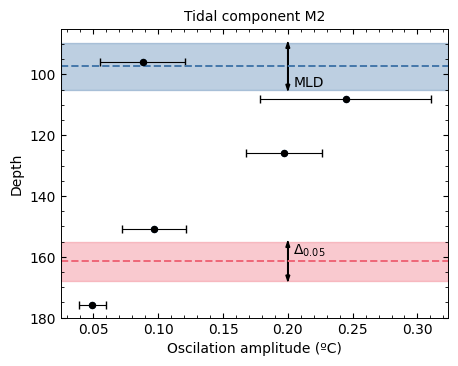

In [14]:
plot_column_oscilation(up3_column, 'M2', up3_fit.D1, up3_delta005, pos1=[0.6, 0.80], 
                       pos2=[0.6, 0.22], x_arrow=0.2, ylim=(180, 85))

## Complete series

In [8]:
ucompl_fit = TidalComponentsFit.compute(fit_chain, period=[None, None, 6])
ucompl_G005 = coef_dataframe(G005.x, period=[None, None, 6])
ucompl_delta005 = coef_dataframe(delta005.x, period=[None, None, 6])

In [11]:
print_component(ucompl_fit, ucompl_G005, 'M2')
print_component(ucompl_fit, ucompl_G005, 'M4')

M2:
ampl -> D1: 2.93+-0.92 m; a2: 0.01818+-0.00987 ºC; G05: 0.0007+-0.0005 ºC/m
fase -> D1: 47.61+-17.94 º; a2: 236.03592+-31.10681 º; G05: 252.4548+-40.0996 º
M4:
ampl -> D1: 0.14+-0.42 m; a2: 0.00438+-0.00314 ºC; G05: 0.0004+-0.0002 ºC/m
fase -> D1: 166.94+-170.15 º; a2: 286.61341+-41.04030 º; G05: 307.8257+-35.2066 º
